# 911 calls 

The dataset contains the 911 calls received by th emergency center of Montgomery between December 2015 and July 2020. It contains 664k entries.

Data source: https://www.kaggle.com/mchirico/montcoalert

* `lat`:  Latitude
* `lng`: Longitude
* `desc`: Description of the emergency
* `zip`: ZIP code
* `title`: Title of the emergency
* `timeStamp`: Date and time of the call
* `twp`: Township
* `addr`: General Address
* `e`: Index column, always 1

---

🎯 We will analyze the fire calls


### Load data

**1.** Read the `911.csv` file as a dataframe and assign it to the variable `calls`

**2.** Print out `calls`first element to get the columns names

**3.** Print out the length of `calls`

**4.** Display the first 5 rows of `calls`

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
calls = pd.read_csv("/content/911.csv") 

In [ ]:
print(calls.columns)

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')


In [ ]:
print(len(calls))

663522


In [ ]:
calls.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1.0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1.0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1.0
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0


In [ ]:
calls.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

In [ ]:
calls.describe(include='all')

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
count,663522.000000,663522.000000,663522,583323.000000,663522,663522,663229,663522,663522.0
unique,NaN,NaN,663282,NaN,148,640754,68,41292,NaN
top,NaN,NaN,CITY AVE & CARDINAL AVE; LOWER MERION; Statio...,NaN,Traffic: VEHICLE ACCIDENT -,2018-10-06 19:26:38,LOWER MERION,SHANNONDELL DR & SHANNONDELL BLVD,NaN
freq,NaN,NaN,5,NaN,148372,9,55490,7285,NaN
mean,40.158162,-75.300105,NaN,19236.055791,NaN,NaN,NaN,NaN,1.0
std,0.220641,1.672884,NaN,298.222637,NaN,NaN,NaN,NaN,0.0
min,0.000000,-119.698206,NaN,1104.000000,NaN,NaN,NaN,NaN,1.0
25%,40.100344,-75.392735,NaN,19038.000000,NaN,NaN,NaN,NaN,1.0
50%,40.143927,-75.305143,NaN,19401.000000,NaN,NaN,NaN,NaN,1.0
75%,40.229008,-75.211865,NaN,19446.000000,NaN,NaN,NaN,NaN,1.0


## Dataset modification

### Extract Fire calls

**1.** Create two dataframes `fire_calls`, `other_calls`

* If the lowercase version of description starts with `'Fire'` then the row belogns to the `fire_calls`dataset. 
* Any description not starting by 'Fire' falls into  `other_calls`.

**3.** Check the number of calls in `fire_calls` and in `other_calls` by printing their length.

In [ ]:
fire_calls = calls[calls['title'].str.lower().str.startswith('fire')]
other_calls = calls[calls['title'].str.lower().str.startswith('fire') == False]

In [ ]:
len(fire_calls)

100622

In [ ]:
len(other_calls)

562900

## Number calls per months and hours

**Let's find if there is a prevalence of fires by month or hours**

**1.** Import the `datetime` modula as `dt`

**2.** Add a column to  `fire_calls` named `month` that will extract the month from the `timestamp`column.

* From the `timeStamp`column (6th element) extract the month.
*e.g: `'2015-12-10 16:47:36'`➡ `December`*
* Use `strptime`and `strftime`methods


**3.** Counts how many events happenned by month 

In [ ]:
import datetime as dt

In [ ]:
def month_dt(y):
    date = dt.datetime.strptime(y,"%Y-%m-%d %H:%M:%S")
    month = '{0:%B}'.format(date)
    return month
    
list_month = []

for element in calls['timeStamp']:
    month = month_dt(element)
    list_month.append(month)
    
ma_Series = pd.Series(list_month)

In [ ]:
calls.insert(2,'month', ma_Series, allow_duplicates=False)

In [ ]:
fire_calls = calls[calls['title'].str.lower().str.startswith('fire')]

In [ ]:
calls.head()

,lat,lng,month,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,December,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,December,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,December,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,December,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,December,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [ ]:
my_list = calls['month'].value_counts()

In [ ]:
print(calls['month'].value_counts())

January      62336
June         60034
March        60027
July         59832
December     57692
May          57509
February     55427
April        53671
October      51240
November     50182
August       48359
September    47213
Name: month, dtype: int64


In [ ]:
for x in my_list:
    print("There are ", x, " events for the month.") 

There are  62336  events for the month.
There are  60034  events for the month.
There are  60027  events for the month.
There are  59832  events for the month.
There are  57692  events for the month.
There are  57509  events for the month.
There are  55427  events for the month.
There are  53671  events for the month.
There are  51240  events for the month.
There are  50182  events for the month.
There are  48359  events for the month.
There are  47213  events for the month.


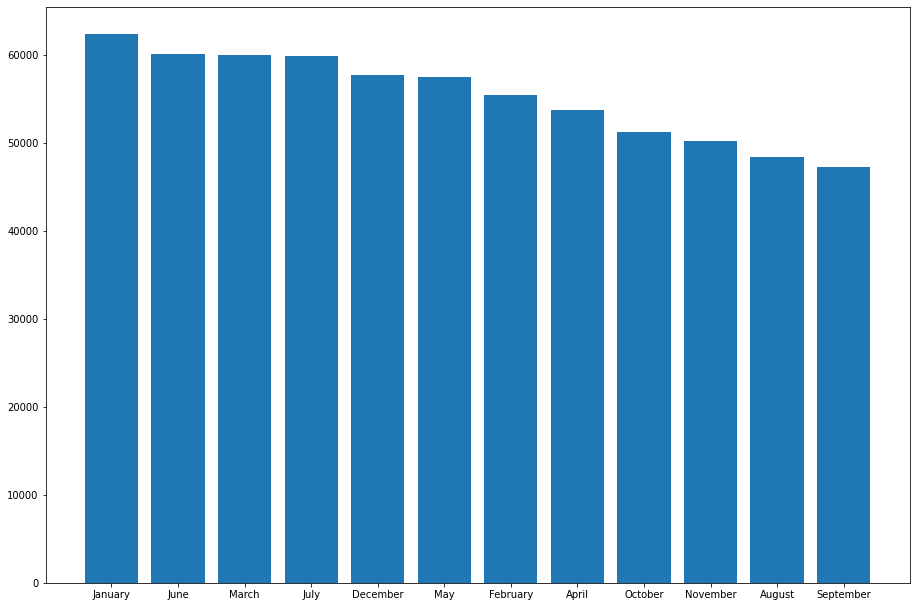

In [ ]:
fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
month = ['January', 'June', 'March', 'July', 'December', 'May', 'February', 'April', 'October', 'November', 'August', 'September']
events = [62336,60034,60027,59832,57692, 57509, 55427, 53671, 51240, 50182, 48359, 47213]
ax.bar(month,events)
plt.show()

**Conclusions** What are your conclusions?


---



We can see that there are more events in January, June, March and July. Its 4 months represent 75% of the events that occur most often during this period. On average, we have 55,293 events per month. Its events take place at the beginning of the year and just before the start of the summer holidays

**4.** Create a column `hour` from the  `timestamp`column and add it to `fire_calls`

**3.** Counts how many events happenned by hour 



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
def hour_dt(y):
    date = dt.datetime.strptime(y, "%Y-%m-%d %H:%M:%S")
    hour = '{0:%H}'.format(date)
    return hour

In [ ]:
list_hour = []

for element in calls['timeStamp']:
    hour = hour_dt(element)
    list_hour.append(hour)

h_Series = pd.Series(list_hour)
fire_calls.insert(2, 'hour', h_Series, allow_duplicates=False)

In [ ]:
fire_calls.head()

,lat,lng,hour,month,desc,zip,title,timeStamp,twp,addr,e
2,40.121182,-75.351975,14,December,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
22,40.199006,-75.300058,17,December,LILAC CT & PRIMROSE DR; UPPER GWYNEDD; 2015-12...,19446.0,Fire: APPLIANCE FIRE,2015-12-10 17:59:24,UPPER GWYNEDD,LILAC CT & PRIMROSE DR,1
27,40.028903,-75.351822,18,December,EDENTON PL & DURHAM DR; DELAWARE COUNTY; 2015-...,19085.0,Fire: CARBON MONOXIDE DETECTOR,2015-12-10 18:05:19,DELAWARE COUNTY,EDENTON PL & DURHAM DR,1
39,40.104206,-75.367665,18,December,HAMPTON RD & BELMONT RD; UPPER MERION; 2015-12...,19406.0,Fire: GAS-ODOR/LEAK,2015-12-10 18:32:25,UPPER MERION,HAMPTON RD & BELMONT RD,1
45,40.224923,-75.528045,18,December,LINFIELD TRAPPE RD; LIMERICK; 2015-12-10 @ 18:...,19468.0,Fire: VEHICLE ACCIDENT,2015-12-10 18:50:23,LIMERICK,LINFIELD TRAPPE RD,1


In [ ]:
my_h_list = fire_calls['hour'].value_counts()

h_dict = {}
total_events = 0

for key in my_h_list.keys():
    print("There are ", my_h_list.get(key=key), " events at ", key, "hour")
    h_dict[key] = my_h_list.get(key=key)
    total_events += my_h_list.get(key=key)

There are  6497  events at  17 hour
There are  6381  events at  18 hour
There are  6155  events at  16 hour
There are  6021  events at  15 hour
There are  5974  events at  13 hour
There are  5956  events at  14 hour
There are  5711  events at  19 hour
There are  5705  events at  12 hour
There are  5681  events at  11 hour
There are  5467  events at  10 hour
There are  5170  events at  09 hour
There are  5079  events at  20 hour
There are  4457  events at  08 hour
There are  4251  events at  21 hour
There are  3508  events at  07 hour
There are  3348  events at  22 hour
There are  2707  events at  23 hour
There are  2421  events at  06 hour
There are  2123  events at  00 hour
There are  1839  events at  05 hour
There are  1769  events at  01 hour
There are  1539  events at  02 hour
There are  1454  events at  03 hour
There are  1409  events at  04 hour


For example, there are 6497 events for the 5 p.m. schedule

## Average calls per hour

We will use the `counts_by_hour`dictionary to **calculate the average number of calls per hour**

Technique:
```
total_fruits = 10
sample_dict = {
                'apple': 1, 
                'banana': 3, 
                'orange': 6
               }

# Iterate over dictionaries

for key, value in sample_dict.items():
  sample_dict[key] = value / total_fruits

Output
sample_dict = {
                'apple': 0.1, 
                'banana': 0.3, 
                'orange': 0.6
               }

```



**Instructions**

Use the example above to calculate the average number of calls per hours.

The result should be a dictionary where the keys are the hours and the values the average number of calls. 


In [ ]:
for key, value in h_dict.items():
    h_dict[key] = value / total_events

In [ ]:
print("Dictionary : \n", h_dict)

Dictionary : 
 {'17': 0.0645683846474926, '18': 0.06341555524636759, '16': 0.06116952555107233, '15': 0.0598378088290831, '13': 0.059370714157937626, '14': 0.05919182683707341, '19': 0.05675697163642146, '12': 0.05669734252946672, '11': 0.05645882610164775, '10': 0.05433205462026197, '09': 0.051380413826002266, '20': 0.05047603903718868, '08': 0.04429448828288048, '21': 0.04224722227743436, '07': 0.03486315119953887, '22': 0.03327304168074576, '23': 0.026902665421080878, '06': 0.0240603446562382, '00': 0.021098765677486038, '05': 0.01827632128162827, '01': 0.01758064836715629, '02': 0.015294865933891197, '03': 0.014450120252032359, '04': 0.014002901949871797}


In [ ]:
print("After mean : \n", h_dict)

After mean : 
 {'17': 0.0645683846474926, '18': 0.06341555524636759, '16': 0.06116952555107233, '15': 0.0598378088290831, '13': 0.059370714157937626, '14': 0.05919182683707341, '19': 0.05675697163642146, '12': 0.05669734252946672, '11': 0.05645882610164775, '10': 0.05433205462026197, '09': 0.051380413826002266, '20': 0.05047603903718868, '08': 0.04429448828288048, '21': 0.04224722227743436, '07': 0.03486315119953887, '22': 0.03327304168074576, '23': 0.026902665421080878, '06': 0.0240603446562382, '00': 0.021098765677486038, '05': 0.01827632128162827, '01': 0.01758064836715629, '02': 0.015294865933891197, '03': 0.014450120252032359, '04': 0.014002901949871797}


## Where do the fires happen? 


**Instructions**

Identify the top 3 Townships where the fire happenned. 

**1.** Create a dictionary where the keys are the Townships and the values the numbers of calls

**2.** Convert that dictionary into `top_townships` a list of lists
```
sample_dict = {'apple': 1,  'banana': 8,  'orange': 6 }
fruits = []
for fruit in sample_dict:
    fruits.append([fruit, 10*sample_dict[fruit]])

Output
[['apple', 10], ['banana', 80], ['orange', 60]]
```

**3.** Use the `sorted()` function to sort `top_townships` and assign it to  `sorted_townships`. Set the reverse argument to `True` and key argument to `lambda x:x[1]`. The  highest value in the second column appears first in the list.

```
sorted_fruits = sorted(fruits, key=lambda x:x[1], reverse = True)

Output
[['apple', 10], ['orange', 60], ['banana', 80]]
```

**4.** Select the first 3 elements of `sorted_townships`

In [ ]:
my_t_list = fire_calls['twp'].value_counts()

t_dict = {}

for key in my_t_list.keys():
    # print("There are ", my_h_list.get(key=key), " events for the", key)
    t_dict[key] = my_t_list.get(key=key)
    #total_events += my_t_list.get(key=key)

In [ ]:
top_townships = []
for twp in t_dict:
    top_townships.append([twp, 10*t_dict[twp]])

In [ ]:
sorted_townships = sorted(top_townships, key=lambda x:x[1], reverse = True)

In [ ]:
for i in range(3):
    print(sorted_townships[i])

['LOWER MERION', 101540]
['ABINGTON', 64590]
['NORRISTOWN', 52480]


## What are the most frequent calls reasons

We focused on `'Fire'`first. Now let's go back to the `calls` list.

We will go through the description column and **count how many calls concern each main categories** amoung:
* EMS
* Fire
* Traffic

**Instructions**

 **1.** Add a text cell below and describe the procedure you will follow

 **2.** Execute it


In [ ]:
calls['Reason'] = calls['title'].apply(lambda title: title.split(':')[0])
print("Reasons :\n",calls['Reason'].value_counts())

Reasons :
 EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64


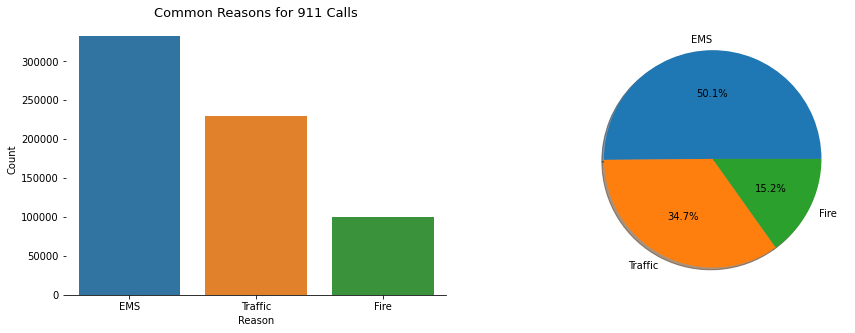

In [ ]:
# sns.countplot(x='Reason',data=calls)

fig, axes = plt.subplots(1,2, figsize=(15, 5))

sns.countplot(x='Reason', data=calls, order=calls['Reason'].value_counts().index, ax=axes[0])
axes[0].set_title('Common Reasons for 911 Calls', size=13)
axes[0].set(xlabel='Reason', ylabel='Count')

calls['Reason'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[1],shadow=True)
axes[1].set(xlabel='', ylabel='')

sns.despine(bottom=False, left=True)

EMS represents 50.1% of the reasons for calls

Traffic represents 34.7% of the reasons for calls

Fire represents 15.2% of the reasons for calls

In [ ]:
byMonth= calls.groupby('month').count()
byMonth['Reason']

month
April        53671
August       48359
December     57692
February     55427
January      62336
July         59832
June         60034
March        60027
May          57509
November     50182
October      51240
September    47213
Name: Reason, dtype: int64

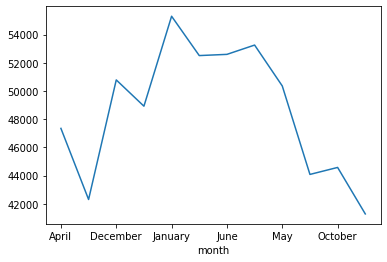

In [ ]:
byMonth['zip'].plot()

We can see that the month of January was the month with the most emergency calls.


For example, in the month of April, there were 53,671 calls for all emergency reasons

# Self-discovery

It's up to you now : propose **a new angle to analyse the 911 calls data**. 
1. Define your business goals (ie : what information are you looking for)
2. Identify and prep the data (process any data transformation required)
3. Write the appropriate code and comment it
4. Draw your conclusions

To go further, we need to know the top 10 emergency calls. Then we could determine the most common emergency titles are fire alarm, vehicle accident and fire investigation. After that, we must specify over which period there are the most emergency calls and on which days. And finally we can indicate at what time there are the most emergency calls.

## The top 10 emergency calls from all the categories.

Vehicle accidents are the number one reason people call 911.

Disabled vehicle and fire alarm are in second and third place.

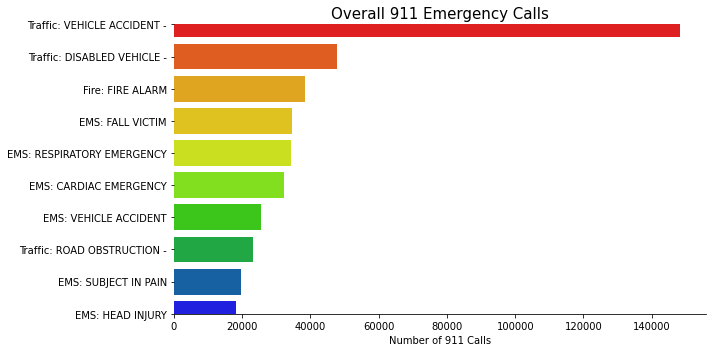

In [ ]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.countplot(y='title', data=calls, order=calls['title'].value_counts().index, palette='prism')
sns.despine(bottom=False, left=True)
axes.set_ylim([9, 0])
axes.set_title('Overall 911 Emergency Calls', size=15)
axes.set(xlabel='Number of 911 Calls', ylabel='')
plt.tight_layout()

## The most common emergency titles are fire alarm, vehicle accident and fire investigation.


Text(0.5, 1.0, 'Fire 911 Emergency Calls')

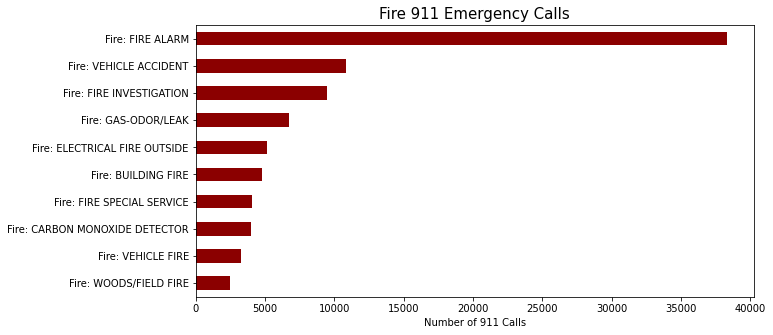

In [ ]:
calls[calls['Reason']=='Fire'].groupby('title').count()['lat'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10, 5), color='darkred')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('Fire 911 Emergency Calls', fontsize=15)

The most common emergency titles are fire alarm, vehicle accident and fire investigation.

We are going to use pd.to_datetime to convert the timeStamp column from string to DateTime object. Then we use .apply() to create 3 new columns called Hour, Day of week.

In [ ]:
calls['timeStamp'] = pd.to_datetime(calls['timeStamp'])

calls['Hour'] = calls['timeStamp'].apply(lambda time: time.hour)
calls['Day of Week'] = calls['timeStamp'].apply(lambda time: time.dayofweek)

Notice how the Day of Week is an integer 0-6. Let's map the actual string names to the day of the week:

In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

calls['Day of Week'] = calls['Day of Week'].map(dmap)

## Weekly and monthly calls
It looks like friday is the day with more calls during the week.
Regarding the monthly calls, looks like during the first semester there are more calls.

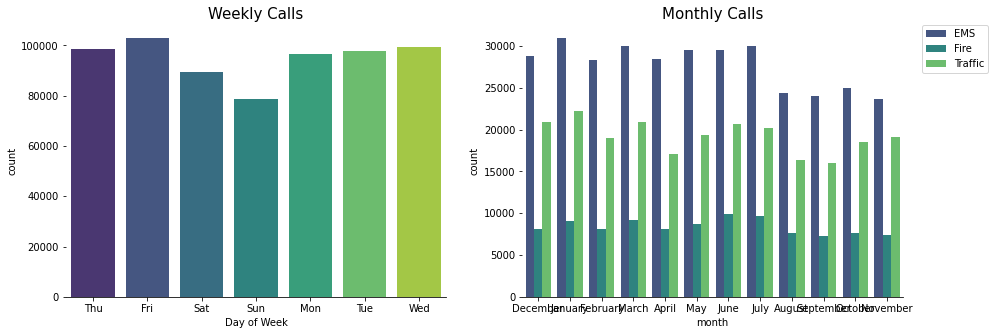

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x='Day of Week', data=calls, palette='viridis', ax=axes[0])
axes[0].set_title('Weekly Calls', size=15)

sns.countplot(x='month', data=calls, hue='Reason', palette='viridis', ax=axes[1])
axes[1].set_title('Monthly Calls', size=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

sns.despine(bottom=False, left=True)


Now on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. 
In the heatmap we can see that during 14:00 and 17:00 hours there are more calls.
Friday and Wednesday have more calls.
Apparently during Sunday the calls drop.

In [ ]:
dayHour = calls.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()

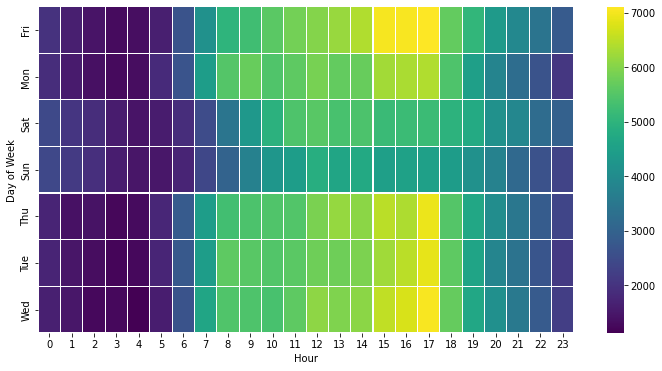

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis', linewidths=0.05)